# Project: Predicting the Presence of Heart Disease

## 1.0 Introduction
   
Heart disease refers to the buildup of plaque in the heart's arteries that can ultimately lead to a heart attack, heart failure, or death.  [The Government of Canada website](https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html) identifies heart disease as the 2nd leading cause of death in Canada.  According to 2017–2018 data from the Canadian Chronic Disease Surveillance System (CCDSS):  
* about 1 in 12 (or 2.6 million) Canadian adults age 20 and over live with diagnosed heart disease
* every hour, about 14 Canadian adults age 20 and over with diagnosed heart disease die

Heart disease impacts a significant portion of the population, and heart disease prevention is clearly important so that more people can live longer, healthier lives.  The development of data-driven methods for predicting heart disease can be used to improve prevention processes by advancing our understanding of the associated risk factors and identifying disease at early onset to allow for rapid intervention.

The Cleveland Heart Disease database ([cleve.mod](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleve.mod)), available from the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease), contains 14 variables related to heart disease diagnosis in 303 anonymous patients: 

* Age (years) 
* Sex (male or female)
* Chest pain type (typical angina, atypical angina, non-anginal pain, asymptomatic)
* Resting blood pressure (mm Hg)
* Cholesterol (mg/dl)
* Fasting blood sugar < 120 mg/dl (true or false)
* Resting electrocardiographic results (normal, abnormal, hypertrophy)
* Max. heart rate (BPM)
* Exercise induced angina (true or false)
* Oldpeak - ST depression induced by exercise relative to rest (mm)
* Slope - the slope of the peak exercise ST segment (upsloping, flat, down sloping)
* Number of major vessels colored by fluoroscopy (0 to 3)  
* Thalassemia blood disorder (normal, fixed defect, reversible defect)
* Presence of heart disease (yes or no)

This project aims to answer the question: can we use the Cleveland Heart Disease data set to develop a K-nearest neighbors classification model to predict the presence of heart disease in a patient, and if so, what is the accuracy of the classification model?

Source of data set: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleve.mod

<img src="https://www.heart.org/-/media/Images/News/2019/July-2019/0725LifeExpectancy_SC.jpg?h=600&w=800&hash=77AD97769808EC7B6D24843976A7CE99" alt="Life Expectancy" height="400" width="400" />
Image source: https://www.heart.org/-/media/Images/News/2019/July-2019/0725LifeExpectancy_SC.jpg

## 2.0 Methods & Results

The following sections provide a detailed explanation of the methods used to clean and wrangle the Cleveland Heart Disease data set, select predictor variables, construct the KNN classification model, and develop classification predictions.

### 2.1 Exploratory Analysis
In the exploratory analysis, we read the Cleveland Heart Disease data set from the web into R, wrangle and clean it into a tidy format.  From the initial set of 13 possible predictor variables, we immediately eliminate three that are non-numerical and do not exhibit a sense of natural order (i.e., chest pain type, slope, and thalassemia blood disorder), reducing the number of possible predictor variables to 10.  The remaining non-numerical predictor variables (i.e., sex, fasting blood sugar, resting electrocardiographic results, and exercise induced angina) can be naturally ordered and converted to numerical values so that they can be summarized, visualized, and assessed for reliability.       

#### 2.1.1 Load Libraries and Set Defaults
* Load `tidyverse`, `repr`, `tidymodels`, `cowplot` libraries for wrangling, classification, and visualization
* Set default number of table rows to display using `options()`

In [1]:
# load libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

#### 2.1.2 Data Loading, Wrangling and Cleaning
The following workflow was used to load the data set from the original source on the web, wrangle and clean the data from its original format to a tidy format for the KNN analysis:

1. Load the data from the web using `read_table()`, remove extra titles and descriptions using `skip()`.
2. Assign column names using `colnames()`. 
3. Use `select()` to select the class variable and all potential predictors.
4. Convert true/false and categorical values into numerical values using `mutate()`, `replace()` and `as.numeric()`, and the class variable `presence_of_heart_disease` to factor using `as_factor()`. 
5. Move the class variable `presence_of_heart_disease` to the first column of the tibble using `bind_cols()` to facilitate grouping/summarizing data.

**Table 1** summarizes the number of missing data for each variable in the dataset.  A total of 5 NA values exist, all belonging to the `number_of_vessels_colored` predictor. Because NA values can be problematic when generating data summaries, and considering that the total number of data rows containing NA is less than 2% of the dataset, the decision was made to eliminate these rows from the data set.

**Table 2** shows the Cleveland Heart Disease data set in tidy format.  The data set consists of 298 observations (rows) and  11 variables (columns) with the variable of our interest: `presence_of_heart_disease`.  



In [2]:
# 1. read data set from web
data <- read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleve.mod", skip = 19, col_names = FALSE) 

# 2. assign column names
colnames(data) <- c("age", 
                    "sex", 
                    "chest_pain_type", 
                    "resting_blood_pres", 
                    "cholesterol", 
                    "fasting_blood_sugar", 
                    "resting_ecg", 
                    "max_heart_rate", 
                    "exercise_induced_angina", 
                    "oldpeak", 
                    "slope", 
                    "number_of_vessels_colored", 
                    "thal", 
                    "presence_of_heart_disease", 
                    "sickness_classifier")

# 3. select class variable and all potential predictor variables
data_selected <- data |>
    select("age", "sex", "resting_blood_pres", "cholesterol", "fasting_blood_sugar", "resting_ecg", "max_heart_rate", "exercise_induced_angina",
     "oldpeak", "number_of_vessels_colored", "presence_of_heart_disease")

# 4. covert boolean(true/false) and ordered categorical values into numerical values, and convert class variable to factor 
data_mutated <- data_selected |>
    mutate(sex = replace(sex, sex == "male", 0)) |>
    mutate(sex = replace(sex, sex == "fem", 1)) |>
    mutate(sex = as.numeric(sex)) |>

    mutate(fasting_blood_sugar = replace(fasting_blood_sugar, fasting_blood_sugar == "true", 1)) |>
    mutate(fasting_blood_sugar = replace(fasting_blood_sugar, fasting_blood_sugar == "fal", 0)) |>
    mutate(fasting_blood_sugar = as.numeric(fasting_blood_sugar)) |>

    mutate(fasting_blood_sugar = replace(fasting_blood_sugar, fasting_blood_sugar == "true", 1)) |>
    mutate(fasting_blood_sugar = replace(fasting_blood_sugar, fasting_blood_sugar == "fal", 0)) |>
    mutate(fasting_blood_sugar = as.numeric(fasting_blood_sugar)) |>

    mutate(resting_ecg = replace(resting_ecg, resting_ecg == "norm", 0)) |>
    mutate(resting_ecg = replace(resting_ecg, resting_ecg == "abn", 1)) |>
    mutate(resting_ecg = replace(resting_ecg, resting_ecg == "hyp", 2)) |>
    mutate(resting_ecg = as.numeric(resting_ecg)) |>

    mutate(exercise_induced_angina = replace(exercise_induced_angina, exercise_induced_angina == "true", 1)) |>
    mutate(exercise_induced_angina = replace(exercise_induced_angina, exercise_induced_angina == "fal", 0)) |>
    mutate(exercise_induced_angina = as.numeric(exercise_induced_angina)) |>

    mutate(number_of_vessels_colored = as.numeric(number_of_vessels_colored)) |>

    mutate(presence_of_heart_disease = replace(presence_of_heart_disease, presence_of_heart_disease == "buff", "no")) |>
    mutate(presence_of_heart_disease = replace(presence_of_heart_disease, presence_of_heart_disease == "sick", "yes")) |>
    mutate(presence_of_heart_disease = as_factor(presence_of_heart_disease))

# 5. re-order columns
data_ordered <- bind_cols(select(data_mutated, presence_of_heart_disease),select(data_mutated, -presence_of_heart_disease))

# summarize the number of missing data
summary_na_table <- data_ordered |> 
    group_by(presence_of_heart_disease) |>
    map_df(~sum(is.na(.)))

# remove rows with na data from data set (5 rows total)
data_prelim <- data_ordered |>
    filter(number_of_vessels_colored != "NA")


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_character(),
  X3 = col_character(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_double(),
  X9 = col_character(),
  X10 = col_double(),
  X11 = col_character(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_character(),
  X15 = col_character()
)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


In [3]:
# print summary of the number of missing data
summary_na_table

presence_of_heart_disease,age,sex,resting_blood_pres,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,number_of_vessels_colored
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,5


##### Table 1: Summary of the missing data (i.e., NA values) for each data set variable. 

In [4]:
# print tidy data set
data_prelim

presence_of_heart_disease,age,sex,resting_blood_pres,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,number_of_vessels_colored
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no,63,0,145,233,1,2,150,0,2.3,0
yes,67,0,160,286,0,2,108,1,1.5,3
yes,67,0,120,229,0,2,129,1,2.6,2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
yes,49,0,118,149,0,2,126,0,0.8,3
no,74,1,120,269,0,2,121,1,0.2,1
no,54,1,160,201,0,0,163,0,0.0,1


##### Table 2: The Cleveland Heart Disease data set in tidy format.

#### 2.1.3 Create the Train / Test Split
The data is split into training and testing sets using 75% of the data for training and 25% for testing.  This is accomplished using `initial_split()` and set `prop = .75`.

The training and testing sets are shown in **Tables 3 and 4**, respectively.  The training set contains 222 observations, and the testing set contains 76 observations. A 75/25 split between training and testing is considered a good balance between training an accurate model (by using a larger training data set) and getting an accurate evaluation of its performance (by using a larger testing data set). 

In [5]:
# set random seed
set.seed(2000)

# split data into training and testing sets
data_split <- initial_split(data_prelim, prop = .75, strata = presence_of_heart_disease)
data_training <- training(data_split)
data_testing <- testing(data_split)

In [6]:
# print training data set
data_training

presence_of_heart_disease,age,sex,resting_blood_pres,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,number_of_vessels_colored
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no,63,0,145,233,1,2,150,0,2.3,0
no,37,0,130,250,0,0,187,0,3.5,0
no,41,1,130,204,0,2,172,0,1.4,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
yes,42,0,136,315,0,0,125,1,1.8,0
yes,77,0,125,304,0,2,162,1,0.0,3
yes,49,0,118,149,0,2,126,0,0.8,3


##### Table 3: Heart disease training data set.

In [7]:
data_testing

presence_of_heart_disease,age,sex,resting_blood_pres,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,number_of_vessels_colored
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
yes,67,0,160,286,0,2,108,1,1.5,3
yes,53,0,140,203,1,2,155,1,3.1,0
yes,56,0,130,256,1,2,142,1,0.6,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
no,68,0,118,277,0,0,151,0,1,1
no,48,0,124,255,1,0,175,0,0,2
no,54,1,160,201,0,0,163,0,0,1


##### Table 4: Heart disease testing data set.

#### 2.1.4 Summarize Training Set Data

We start exploring the training data by generating summary tables.  

**Table 5** summarizes the number and percentage of observations in each class for the class variable `presence_of_heart_disease` in the training set.  The "yes" and "no" classes contain 120 (54.1%) and 102 (45.9%) observations, respectively. Note that we only show visualizations for variables deemed to be associated with the presence of heart disease.

**Table 6** summarizes the mean values for each potential predictor variable in the training set for each class.  The table was generated by first using `group_by()` to group the observations based on the class variable `presence_of_heart_disease`, and then using `summarize()` and `across()` to calculate the mean values for each predictor variable.  Based on the mean values summarized in Table 6, we start to get a sense of which variables may be valuable predictors in the KNN model.        



In [8]:
# summarize the number and percentage of observations in each class in training set
summary_obs_table <- data_training |> 
    group_by(presence_of_heart_disease) |>
    summarize(n = n()) |>
    mutate(percent = 100 * n/nrow(data_training))
summary_obs_table

presence_of_heart_disease,n,percent
<fct>,<int>,<dbl>
no,120,54.05405
yes,102,45.94595


#####  Table 5: Number and percentage of observations for the class variable (presence of heart disease) in the training set.

In [9]:
# create summary table of mean values for each predictor variable in the training data set
summary_mean_table <- data_training |> 
    group_by(presence_of_heart_disease) |>
    summarize(across(age:number_of_vessels_colored, mean)) 
    summary_mean_table

presence_of_heart_disease,age,sex,resting_blood_pres,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,number_of_vessels_colored
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no,52.67500,0.4666667,129.3250,247.3500,0.1416667,0.8583333,159.4500,0.1500000,0.6133333,0.2916667
yes,57.23529,0.1764706,133.5686,252.2843,0.1666667,1.2058824,139.0686,0.5098039,1.5382353,1.2058824


##### Table 6: Summary of mean values for each predictor variable in the training set

#### 2.1.5 Visualize Training Set Data
We continue our exploration of the training data by generating box plot and bar graph visualizations. **Figures 1 to 3** show box plot visualizations for `age`, `max_heart_rate`, and `oldpeak` respectively.  **Figures 4 to 7** show bar graph visualizations for `sex`, `resting_ecg`, `exercise_induced_angina`, and `number_of_vessels_colored`, respectively. Note we have only show visualizations for variables that were deemed to show an association with the presence of heart disease.

Variables that show similar mean values or frequencies across the predictor classes suggest little to no association with the presence of heart disease and will not be reliable predictors in the KNN model. Based on this and a review of **Table 6** and **Figures 1 to 7**, we conclude that `age`, `sex`,  `oldpeak`, `max_heart_rate`, `resting_ecg`, `exercise_induced_angina`, and `number_of_vessels_colored` all  show an association with the presence of heart disease and therefore are good candidates to include in our model for predicting heart disease.

In [10]:
# generate box-plot visualizations
options(repr.plot.width = 8, repr.plot.height = 8)

age_plot <- data_training |>
    ggplot(aes(y = age, x = presence_of_heart_disease)) + 
    geom_boxplot() + 
    ylab("Age (years)") +
    xlab("Heart Disease") +
    ggtitle("Fig.1: Age") +
    theme(text = element_text(size = 17))

rbp_plot <- data_training |>
    ggplot(aes(y = resting_blood_pres, x = presence_of_heart_disease)) + 
    geom_boxplot() + 
    ylab("Resting Blood Pressure (mm Hg)") +
    xlab("Heart Disease") +
    ggtitle("Fig. NA: Resting Blood Pressure") +
    theme(text = element_text(size = 17))

cholesterol_plot <- data_training |>
    ggplot(aes(y = cholesterol, x = presence_of_heart_disease)) + 
    geom_boxplot() +
    ylab("Cholesterol (mg/dl)") +
    xlab("Heart Disease") +
    ggtitle("Fig. NA: Cholesterol") +
    theme(text = element_text(size = 17))

mhr_plot <- data_training |>
    ggplot(aes(y = max_heart_rate, x = presence_of_heart_disease)) + 
    geom_boxplot() +
    ylab("Max. Heart Rate (BPM)") +
    xlab("Heart Disease") +
    ggtitle("Fig. 2: Max. Heart Rate") +
    theme(text = element_text(size = 17))

oldpeak_plot <- data_training |>
    ggplot(aes(y = oldpeak, x = presence_of_heart_disease)) + 
    geom_boxplot() +
    ylab("Old Peak (mm)") +
    xlab("Heart Disease") +
    ggtitle("Fig. 3: Old Peak") +
    theme(text = element_text(size = 17))

# generate bar graph visualizations
sex_plot <- data_training |>
    ggplot(aes(x = sex, fill = presence_of_heart_disease)) + 
    geom_bar(position = "fill") +
    labs(x = "Sex \n (0 = Male, 1 = Female)", y = "Frequency", fill = "Heart Disease") +
    scale_x_continuous(breaks=seq(0, 1)) +
    ggtitle("Fig. 4: Sex") +
    theme(text = element_text(size = 17))

fasting_blood_sugar_plot <- data_training |>
    ggplot(aes(x = fasting_blood_sugar, fill = presence_of_heart_disease)) + 
    geom_bar(position = "fill") +
    labs(x = "Fasting Blood Sugar < 120 mg/dl \n (0 = False, 1 = True)", y = "Frequency", fill = "Heart Disease") +
    scale_x_continuous(breaks=seq(0, 1)) +
    ggtitle("Fig. NA: Fasting Blood Sugar") +
    theme(text = element_text(size = 17))

resting_ecg_plot <- data_training |>
    ggplot(aes(x = resting_ecg, fill = presence_of_heart_disease)) + 
    geom_bar(position = "fill") +
    labs(x = "Resting ECG \n (0 = Normal, 1 = Abnormal, 3 = Hypertrophy)", y = "Frequency", fill = "Heart Disease") +
    scale_x_continuous(breaks=seq(0, 2, 1)) +
    ggtitle("Fig. 5: Resting ECG") +
    theme(text = element_text(size = 17))

exercise_induced_angina_plot <- data_training |>
    ggplot(aes(x = exercise_induced_angina, fill = presence_of_heart_disease)) + 
    geom_bar(position = "fill") +
    labs(x = "Exercise-Induced Angina \n (0 = False, 1 = True)", y = "Frequency", fill = "Heart Disease") +
    scale_x_continuous(breaks=seq(0, 1)) +
    ggtitle("Fig. 6: Exercise-Induced Angina") +   
    theme(text = element_text(size = 17))

data_vessels_plot <- data_training |>
    ggplot(aes(x = number_of_vessels_colored, fill = presence_of_heart_disease)) +
    geom_bar(position = "fill") +
    labs(x = "Number of Vessels Colored", y = "Frequency", fill = "Heart Disease", title = "Fig. 7: Vessels Colored") +
    scale_x_continuous(breaks=seq(0, 3, 1)) +
    theme(text = element_text(size = 17))

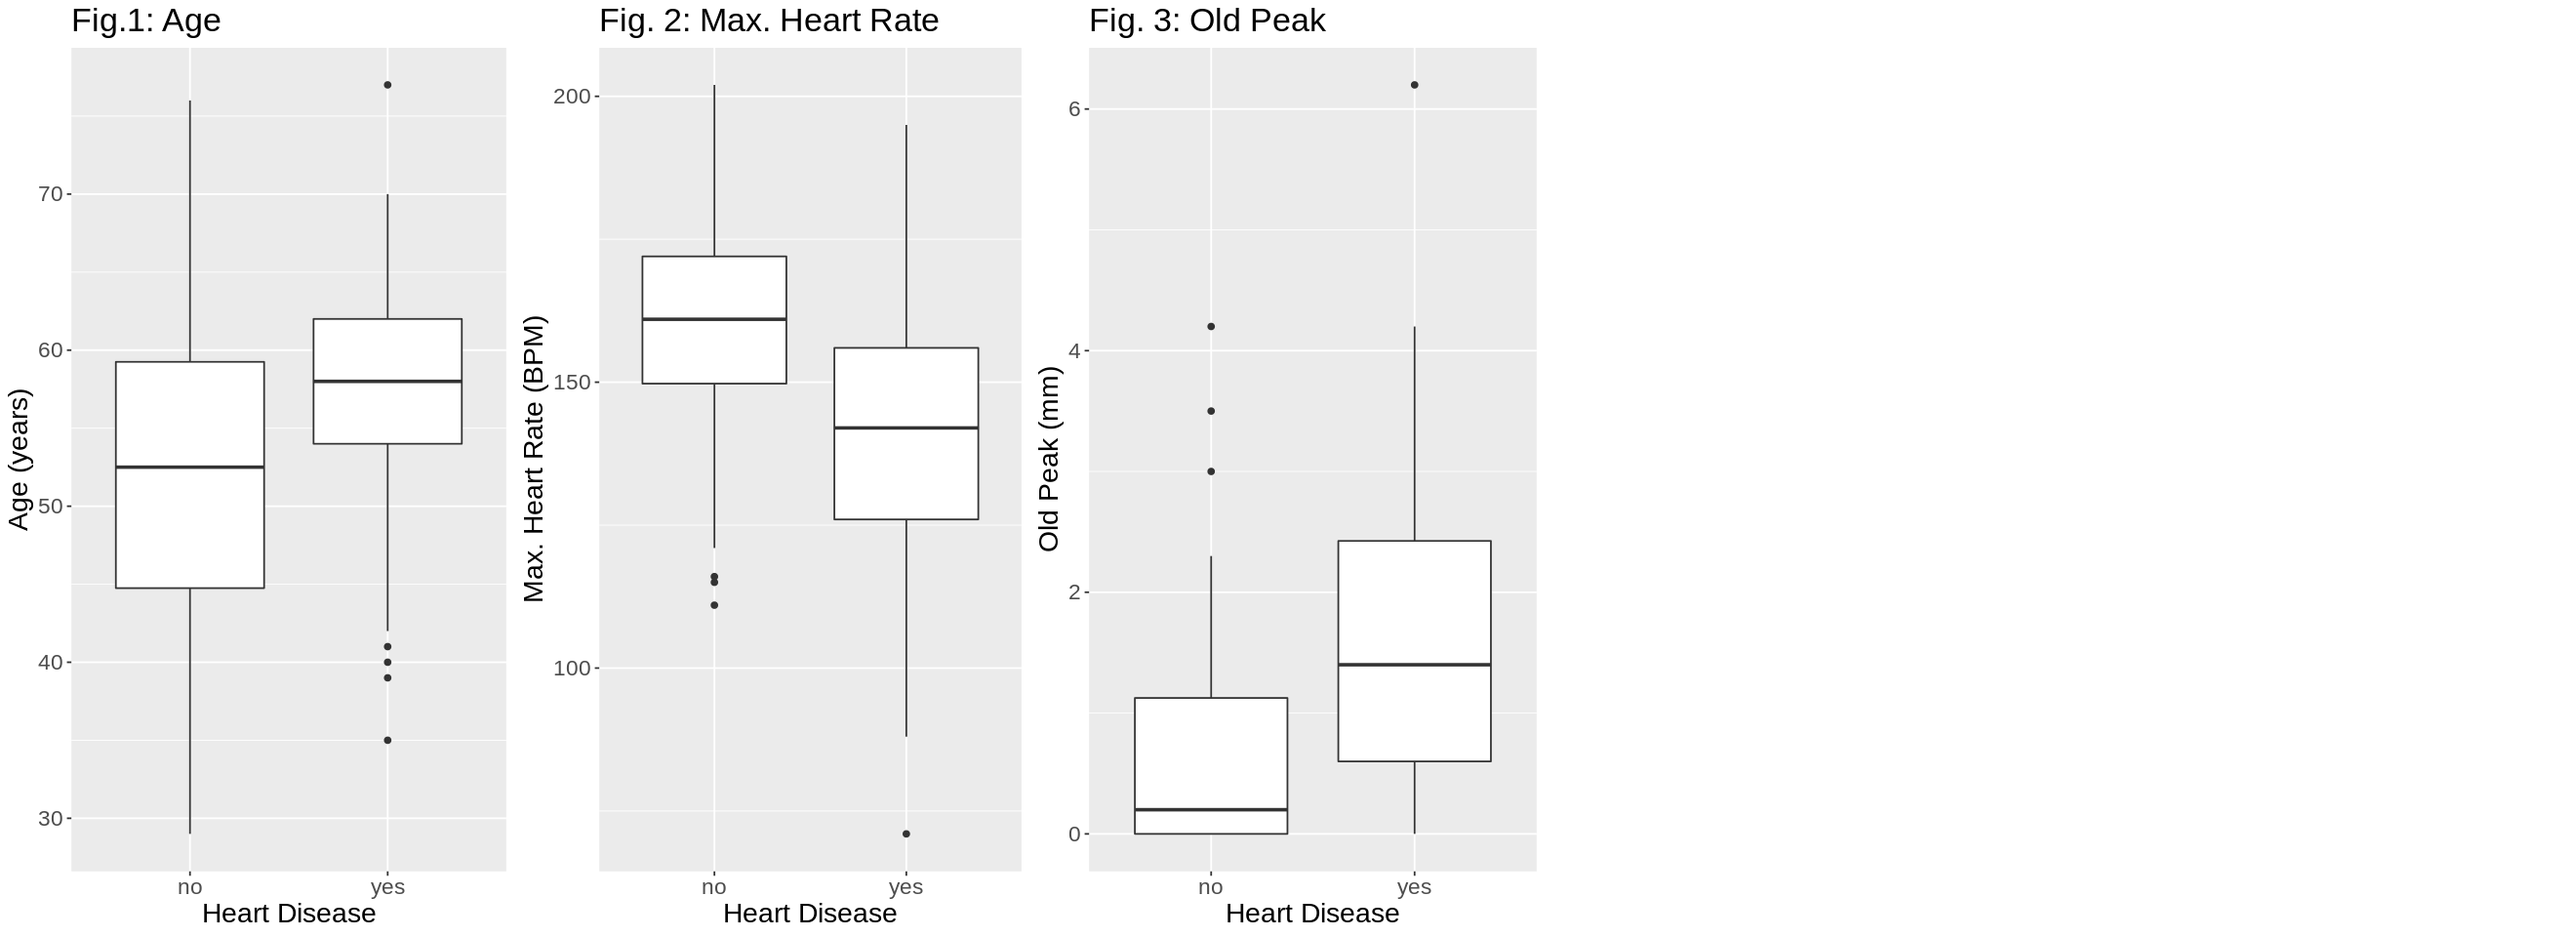

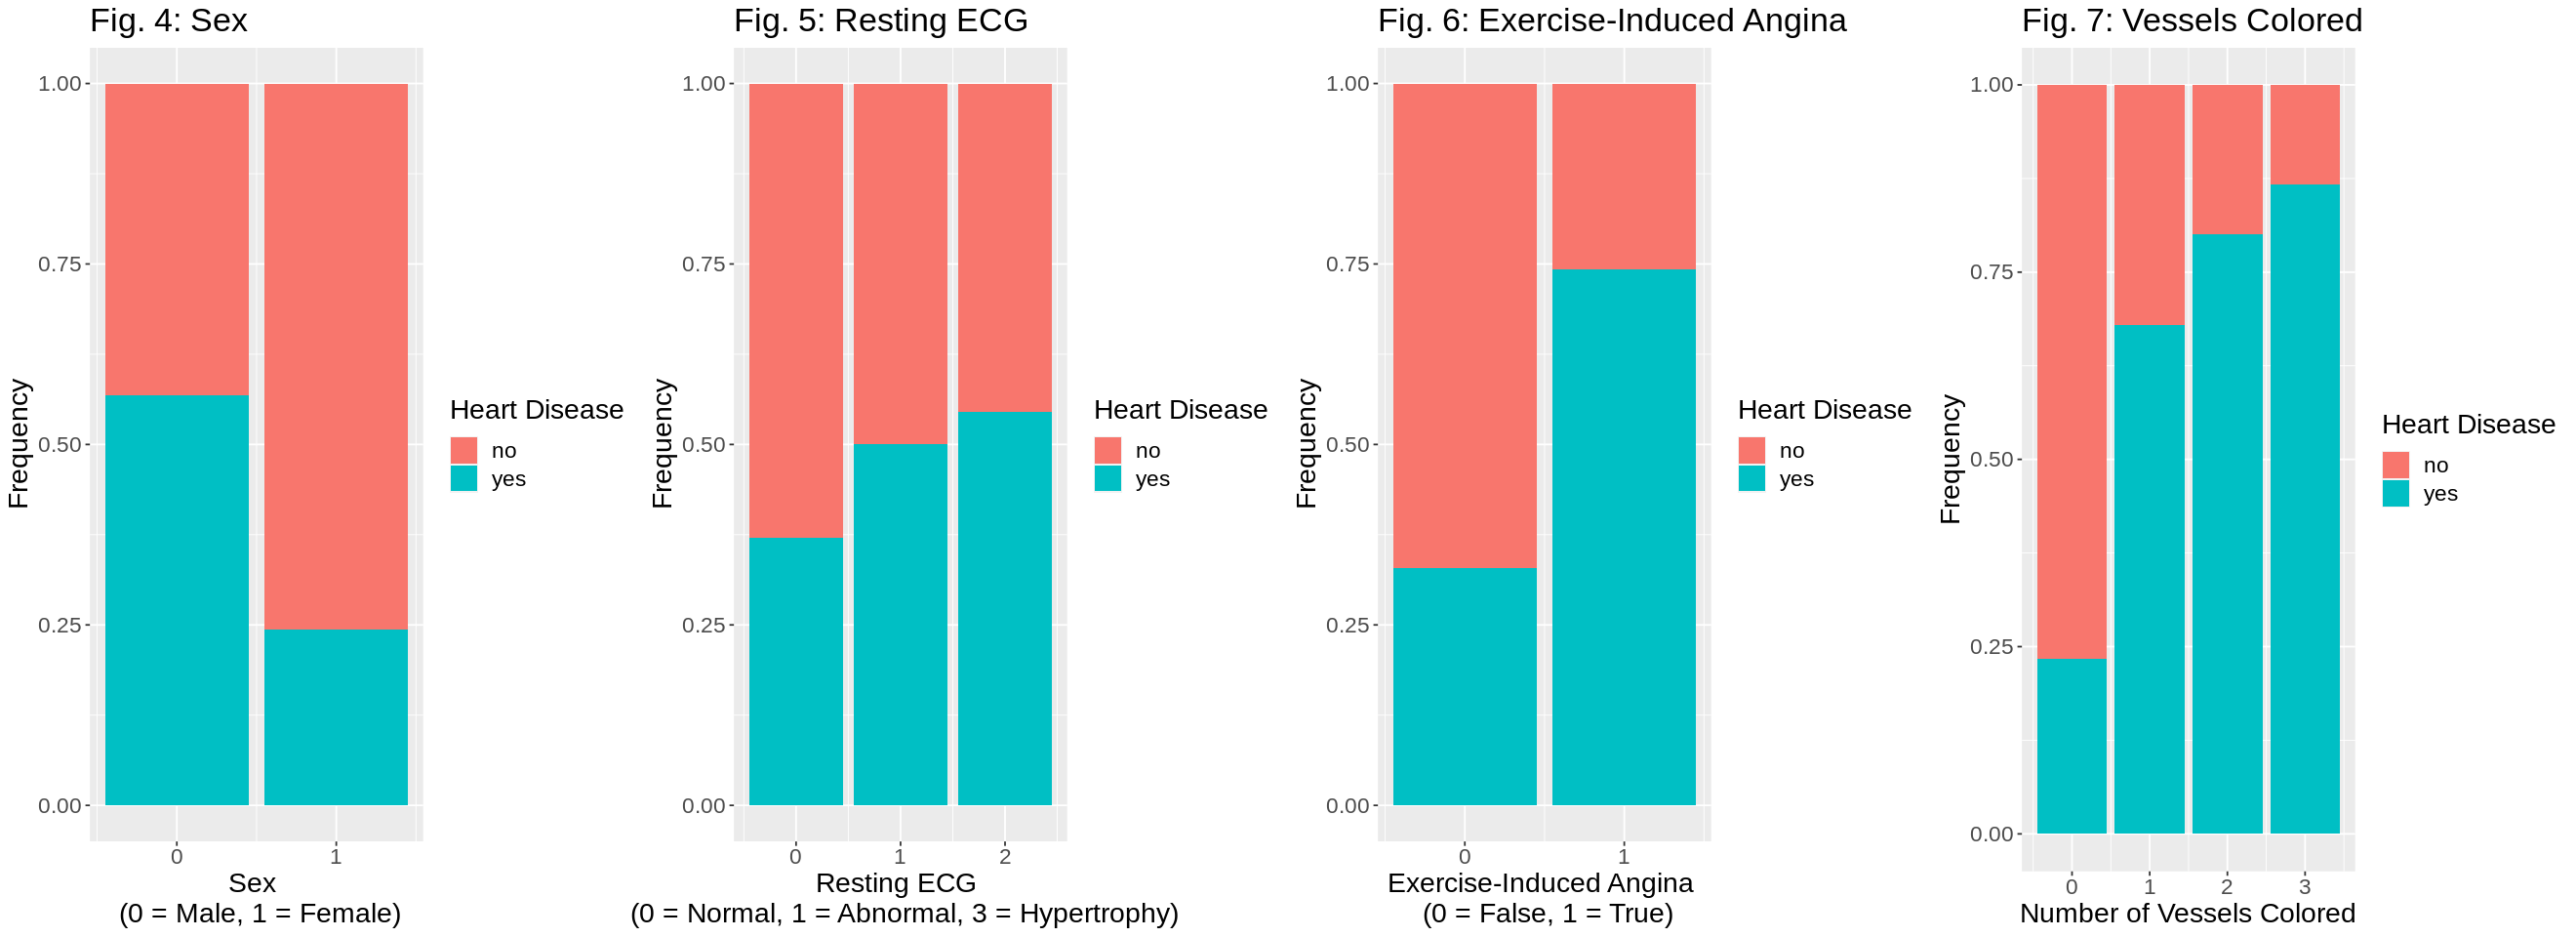

In [11]:
options(repr.plot.width = 22, repr.plot.height = 8)

plot_grid_1 <- plot_grid(age_plot, mhr_plot, oldpeak_plot, ncol = 5)
plot_grid_1

options(repr.plot.width = 22, repr.plot.height = 8)
plot_grid_2 <- plot_grid(sex_plot, resting_ecg_plot,
                         exercise_induced_angina_plot, data_vessels_plot, ncol = 4)
plot_grid_2

### 2.2 KNN Classification
#### 2.2.1 KNN Model Development

Now that our data is in tidy format and split into training and test sets, and we have identified our predictor variables, the following workflow is used to develop, train and tune the KNN classification model:   

1. Create a `recipe()` that specifies the target and predictor variables, as well as preprocessing steps for all variables. 
    * We pass the training data as the data argument of the recipe.
    * Since large contrasts in scale can influence the KNN algorithm, we normalize the scale of all predictor variables by applying `step_scale()` and `step_center()`.  
2. Create a KNN model specification, with `weight_func = "rectangular"` and `neighbors = tune()`.
3. Use the `vfold_cv()` function for cross-validation.
    * We have opted to perform a 10-fold cross-validation to decrease the standard error of the accuracy. 
4. Specify a range of 𝐾 values to test.
    * We test 𝐾 values from 1 to 25.
5. Add the recipe and KNN model specification to a `workflow()`, and use the `tune_grid()` on the training/validation splits to estimate the classifier accuracy for the selected range of 𝐾 values.
6. Pick the value of 𝐾 that yields the highest mean accuracy estimate. 

**Table 7** summarizes the estimated classifier accuracy on the validation splits for the selected range of 𝐾 values.  These results are shown visually in **Figure 11**.  Ultimately, a 𝐾 value of 21 yielded the highest mean accuracy.
    

In [12]:
set.seed(2000) 

# 1. create recipe that specifies the target and predictor variables and the preprocessing steps for all variables
hd_recipe <- recipe(presence_of_heart_disease ~ age + max_heart_rate + oldpeak + sex + 
                    resting_ecg + exercise_induced_angina + number_of_vessels_colored, 
                    data = data_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# 2. create KNN  model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine ("kknn") |>
    set_mode ("classification")

# 3. split up the training data for cross validation
hd_vfold <- vfold_cv(data_training, v = 10, strata = presence_of_heart_disease)

# 4. specifiy range of K values to test
grid_vals <- tibble(neighbors = seq(1, 25))

# 5. add the recipe and KNN model specification to a workflow, and use the tune_grid function on the training/validation splits 
# to estimate the classifier accuracy for a range of 𝐾 values
hd_results <- workflow() |>
    add_recipe(hd_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = hd_vfold, grid = grid_vals) |>
    collect_metrics() |>
    filter (.metric == "accuracy") |>
    arrange(desc(mean))

# 6. pick the value of 𝐾 that yields the highest mean accuracy estimate 
k_best <- hd_results |>
    arrange(desc(mean)) |>
    select(neighbors) |>
    slice(1) |>
    pull()

# visualize the results of 𝐾 neighbours accuracy
ky <- hd_results |>
    filter(neighbors == k_best) |>
    select(mean) |>
    pull()

cross_val_plot <- hd_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    geom_vline(xintercept = k_best, colour = "red") +
    geom_point(aes(x = k_best, y = ky), size = 4, colour = "blue") +
    labs(x = "\nNeighbours",
         y = "Accuracy Estimate\n",
         title = "Fig. 11: Estimated Accuracies of 𝐾 Neighbours") +
    scale_x_continuous(limits = c(1, 25),
                       breaks = seq(1, 25),
                       minor_breaks = seq(1, 25, 1)) +
    theme(text = element_text(size = 15),
          plot.caption = element_text(size = 20, hjust = 0))


In [13]:
hd_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
21,accuracy,binary,0.8114625,10,0.03376460,Preprocessor1_Model21
22,accuracy,binary,0.8114625,10,0.03376460,Preprocessor1_Model22
15,accuracy,binary,0.8071146,10,0.03702005,Preprocessor1_Model15
⋮,⋮,⋮,⋮,⋮,⋮,⋮
6,accuracy,binary,0.7660079,10,0.03417468,Preprocessor1_Model06
3,accuracy,binary,0.7298419,10,0.03302893,Preprocessor1_Model03
4,accuracy,binary,0.7298419,10,0.03302893,Preprocessor1_Model04


##### Table 7: Estimated classifier accuracy on train/validation splits for the selected range of 𝐾 values.

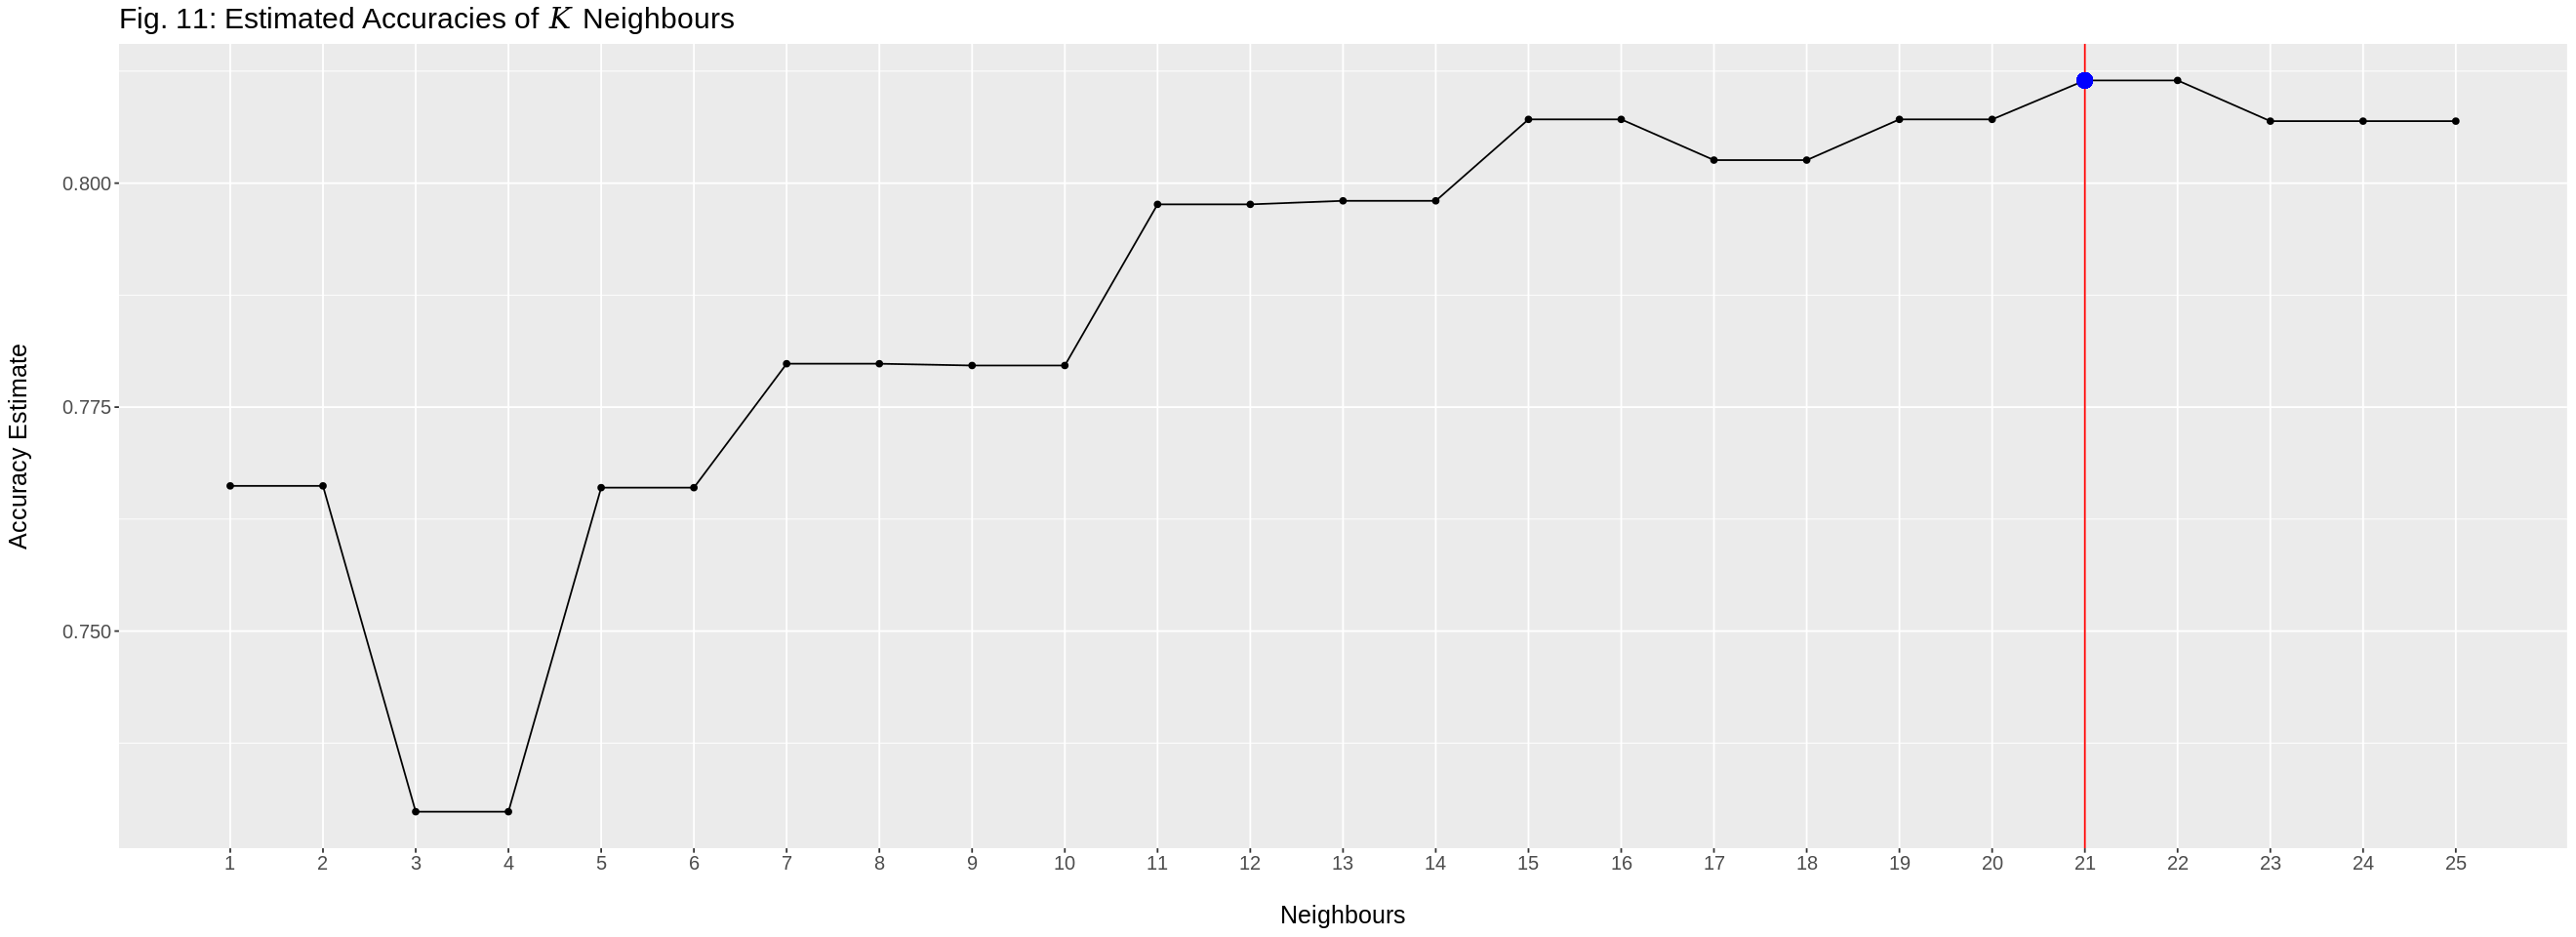

In [14]:
cross_val_plot

#### 2.2.2 KNN Model Prediction
Now that we have identified the best 𝐾 value to use based on the 10-fold cross-validation, we can re-train the KNN model and develop class predictions for the testing set. This process is summarized in the following workflow: 


1. Create a new KNN model specification with the best 𝐾 value.
2. Re-train the classifier using the `fit()` function.
3. Evaluate the estimated accuracy of the classifier on the test set using the `predict()` function.
4. Compare the accuracy of predictions to the true values in the testing set.
5. Compare the predictions to the true values in the testing set using a confusion matrix.

**Table 8** shows the overall accuracy of KNN model predictions based on "true" values in the testing set. From the `.estimate` column, we see that our model's overall accuracy is about 77.6%. 

**Table 9** shows the confusion matrix comparison of KNN model predictions to the true values in the test set.  From this matrix table, we see that the classifier successfully predicted "no" (absence of heart disease) with an accuracy of about 87.8% (36/41) and "yes" (presence of heart disease) with an accuracy of about 65.7% (23/35).

In [15]:
set.seed(2000) 

# 1. create KNN model specification with best 𝐾 value 
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_best) |>
    set_engine ("kknn") |>
    set_mode ("classification")

# 2. re-train the classifier using the fit() function
hd_fit <- workflow() |>
    add_recipe(hd_recipe) |>
    add_model(knn_best_spec) |>
    fit(data = data_training) 

# 3. evaluate the estimated accuracy of the classifier on the test set using the predict function()
hd_predictions <- predict(hd_fit, data_testing) |>
    bind_cols(data_testing)

# 4. compare the accuracy of predictions to the true values in the test set
hd_acc <- hd_predictions |> 
    metrics(truth = presence_of_heart_disease, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)

# 5. compare the predictions to the true values in the test set using a confusion matrix
hd_cm <- hd_predictions |> 
    conf_mat(truth = presence_of_heart_disease, estimate = .pred_class)


In [16]:
hd_acc

.metric,.estimate
<chr>,<dbl>
accuracy,0.7763158


##### Table 8: Overall accuracy of KNN model predictions based on true values in the test set.

In [17]:
hd_cm

          Truth
Prediction no yes
       no  36  12
       yes  5  23

##### Table 9: Confusion matrix comparison of KNN model predictions to the true values in the test set.

## 3.0 Discussion
The overall prediction accuracy of our model is about 77.6% based on the true values in the test set. This outperforms the majority classifier from the training set, which obtains an accuracy of about 54.1% (Table 5).  We also note that our model's accuracy is comparable to results obtained by other researchers working with the Cleveland Heart Disease data set. Aha & Kibler (1988) reported a 77% classification accuracy using an NTgrowth algorithm, Detrano et al. (1989) reported a 77% classification accuracy based on a logistic-regression-derived discriminant function, and Gennari et al. (1989) reported 78.9% classification accuracy using the CLASSIT clustering system.  These results indicate that although our KNN classification model is simple, it is seemingly robust and able to produce accuracies in line with assumably more complex classification algorithms.             

Although our model performs relatively well at 77.6% classification accuracy, this level of accuracy is too low to be reliably applied to medical applications in the real world.  Most concerning are the results from the confusion matrix, which indicate that the model only successfully predicted "yes" with 65.7% accuracy in patients with heart disease.  This accuracy level is far too low considering the consequences of missing a heart disease diagnosis in a sick patient could be fatal. Realistically we would need to see an accuracy approaching 100% for a model to be adopted in a real-world medical setting.  Overall, these are the results we expected based on our exploratory analyses and review of work performed by other researchers.

These findings do lead to future questions regarding heart disease prediction. For example, if more predictors were available, would the accuracy increase? Does the accuracy of the prediction model change based on geographical location? Overall, while the current model is an accurate prediction for the given information, it is still not enough to apply it to the medical field unless further processes are done to increase accuracy.


## 4.0 References

Aha, D., & Kibler, D. (1988). Instance-based prediction of heart-disease presence with the Cleveland database. University of California, 3(1), 3-2.

Detrano, R. (1990). "cleve.mod". Heart Disease Data Set, UCI machine learning repository. https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleve.mod

Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J. J., Sandhu, S., ... & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American journal of cardiology, 64(5), 304-310.

Gennari, J. H., Langley, P., & Fisher, D. (1989). Models of incremental concept formation. Artificial intelligence, 40(1-3), 11-61.

"Heart Disease in Canada". (2022). Government of Canada. https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html

"Here's How Many Years You Could Gain By Keeping Heart Disease At Bay". (2019). Heart.org. https://www.heart.org/-/media/Images/News/2019/July-2019/0725LifeExpectancy_SC.jpg?h=600&w=800&hash=77AD97769808EC7B6D24843976A7CE99